Emovectors

# Emovectors - Measuring emotional content in music



This notebook uses librosa, pandas, numpy, statistics

In [127]:

#%pip install librosa
#%pip install midi2audio
#%pip install pandas
#%pip install numpy
#%pip install statistics
#%pip install fluidsynth


import librosa
import pandas as pd
import numpy as np
from statistics import mean, variance, stdev
from midi2audio import FluidSynth
import fluidsynth

## Datastructure for use in this notebook

This notebook uses pandas data frames to store musical information

For the gtzan dataset, we use df_emo_gtzan
For the weimar Jazz dataset, we use df_emo_wjd
For the Impro-visor dataset, we use df_emo_iv

In [128]:
def set_up_df_emo():
    df_emo = pd.DataFrame(
        columns=['filename', 'y', 'sr', 'full_path', 'tempo', 'beat_frames', 'beat_times'])
    df_emo.set_index('filename')
    return df_emo


def readin_data(path, tracknames, df_emo, midi_boolean):
    ''' if midi_boolean:
        # from https://pypi.org/project/midi2audio/
        # using the default sound font in 44100 Hz sample rate
        fs = FluidSynth() '''
    for track in tracknames:
        pt = path+track    
        print(pt)
        #if midi_boolean:
        #    pt = fs.midi_to_audio(path+track, 'temp.wav')
        y, sr = librosa.load(pt)
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        beat_times = librosa.frames_to_time(beat_frames, sr=sr)
        new_emo_jazz = {"filename":track, "y": y, "sr": sr, "full_path": path+track, 
                        "tempo": tempo, "beat_frames": beat_frames, "beat_times": beat_times}
        df_emo.loc[track] = new_emo_jazz
                
            

### Read in data

1. gtzan data read into df_emo_gtzan
Data in gtzan_genre/genres_original/jazz/*
tracknames: jazz.[5-digit_trackno].wav

NOT WORKING 2. weimar jazz db data read into df_emo_wjd
Data in weimarJazzDatabase/RELEASE2.0_mid_unquant/*.mid
tracknames: listed in weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt

3. improvisor data read into df_emo_iv
Data in improvisor-transcriptions/*.mp3
tracknames: listed in improvisor-transcriptions/listings.txt


In [ ]:
df_emo_gtzan = set_up_df_emo()
path = 'gtzan_genre/genres_original/jazz/'
tracknames = []
for i in range(0, 100):
    tracknames.append('jazz.'+str(i).zfill(5)+'.wav')
print(tracknames)
readin_data(path=path, tracknames=tracknames, df_emo=df_emo_gtzan, midi_boolean=False)
df_emo_gtzan.describe

['jazz.00000.wav', 'jazz.00001.wav', 'jazz.00002.wav', 'jazz.00003.wav', 'jazz.00004.wav', 'jazz.00005.wav', 'jazz.00006.wav', 'jazz.00007.wav', 'jazz.00008.wav', 'jazz.00009.wav', 'jazz.00010.wav', 'jazz.00011.wav', 'jazz.00012.wav', 'jazz.00013.wav', 'jazz.00014.wav', 'jazz.00015.wav', 'jazz.00016.wav', 'jazz.00017.wav', 'jazz.00018.wav', 'jazz.00019.wav', 'jazz.00020.wav', 'jazz.00021.wav', 'jazz.00022.wav', 'jazz.00023.wav', 'jazz.00024.wav', 'jazz.00025.wav', 'jazz.00026.wav', 'jazz.00027.wav', 'jazz.00028.wav', 'jazz.00029.wav', 'jazz.00030.wav', 'jazz.00031.wav', 'jazz.00032.wav', 'jazz.00033.wav', 'jazz.00034.wav', 'jazz.00035.wav', 'jazz.00036.wav', 'jazz.00037.wav', 'jazz.00038.wav', 'jazz.00039.wav', 'jazz.00040.wav', 'jazz.00041.wav', 'jazz.00042.wav', 'jazz.00043.wav', 'jazz.00044.wav', 'jazz.00045.wav', 'jazz.00046.wav', 'jazz.00047.wav', 'jazz.00048.wav', 'jazz.00049.wav', 'jazz.00050.wav', 'jazz.00051.wav', 'jazz.00052.wav', 'jazz.00053.wav', 'jazz.00054.wav', 'jazz.000

gtzan_genre/genres_original/jazz/jazz.00001.wav
gtzan_genre/genres_original/jazz/jazz.00002.wav
gtzan_genre/genres_original/jazz/jazz.00003.wav
gtzan_genre/genres_original/jazz/jazz.00004.wav
gtzan_genre/genres_original/jazz/jazz.00005.wav
gtzan_genre/genres_original/jazz/jazz.00006.wav
gtzan_genre/genres_original/jazz/jazz.00007.wav
gtzan_genre/genres_original/jazz/jazz.00008.wav
gtzan_genre/genres_original/jazz/jazz.00009.wav
gtzan_genre/genres_original/jazz/jazz.00010.wav
gtzan_genre/genres_original/jazz/jazz.00011.wav
gtzan_genre/genres_original/jazz/jazz.00012.wav
gtzan_genre/genres_original/jazz/jazz.00013.wav
gtzan_genre/genres_original/jazz/jazz.00014.wav
gtzan_genre/genres_original/jazz/jazz.00015.wav
gtzan_genre/genres_original/jazz/jazz.00016.wav
gtzan_genre/genres_original/jazz/jazz.00017.wav
gtzan_genre/genres_original/jazz/jazz.00018.wav
gtzan_genre/genres_original/jazz/jazz.00019.wav
gtzan_genre/genres_original/jazz/jazz.00020.wav
gtzan_genre/genres_original/jazz/jazz.00

In [ ]:
''' df_emo_wjd = set_up_df_emo()
path = 'weimarJazzDatabase/RELEASE2.0_mid_unquant/'
with open('weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt', 'r') as file:
    tracknames = [track.strip() for track in file]
print(tracknames)
readin_data(path, tracknames, df_emo_wjd, True)
df_emo_wjd.describe '''

" df_emo_wjd = set_up_df_emo()\npath = 'weimarJazzDatabase/RELEASE2.0_mid_unquant/'\nwith open('weimarJazzDatabase/RELEASE2.0_mid_unquant/listings.txt', 'r') as file:\n    tracknames = [track.strip() for track in file]\nprint(tracknames)\nreadin_data(path, tracknames, df_emo_wjd, True)\ndf_emo_wjd.describe "

In [ ]:
df_emo_iv = set_up_df_emo()

path = 'improvisor-transcriptions/'
with open('improvisor-transcriptions/listings.txt', 'r') as file:
    tracknames = [track.strip() for track in file]
print(tracknames)
readin_data(path, tracknames, df_emo_iv, False)
df_emo_iv.describe

['AnthropologyParker.wav', 'LairdBairdParker.wav', 'NowsTheTimeBrown.wav', 'NowsTheTimeParker.wav', 'YardbirdSuiteParker.wav', 'sound001.wav']
improvisor-transcriptions/AnthropologyParker.wav
improvisor-transcriptions/LairdBairdParker.wav
improvisor-transcriptions/NowsTheTimeBrown.wav
improvisor-transcriptions/NowsTheTimeParker.wav
improvisor-transcriptions/YardbirdSuiteParker.wav
improvisor-transcriptions/sound001.wav


<bound method NDFrame.describe of                                         filename  \
AnthropologyParker.wav    AnthropologyParker.wav   
LairdBairdParker.wav        LairdBairdParker.wav   
NowsTheTimeBrown.wav        NowsTheTimeBrown.wav   
NowsTheTimeParker.wav      NowsTheTimeParker.wav   
YardbirdSuiteParker.wav  YardbirdSuiteParker.wav   
sound001.wav                        sound001.wav   

                                                                         y  \
AnthropologyParker.wav   [-9.322539e-07, 1.582317e-06, -2.3529865e-06, ...   
LairdBairdParker.wav     [-8.2701445e-07, 1.475215e-06, -2.2388995e-06,...   
NowsTheTimeBrown.wav     [0.00033224327, -0.0004459333, 0.0011267527, -...   
NowsTheTimeParker.wav    [0.0004157871, -0.00015784707, 0.0022944454, 0...   
YardbirdSuiteParker.wav  [0.00044449046, 1.277402e-05, 0.0019360762, 0....   
sound001.wav             [0.0005964786, 0.00043693185, 0.0025380924, 0....   

                            sr  \
AnthropologyParker.w

## Audio features to extract for analysis:

* Tempo
* Microstructural irregularity - treated as beat irregularity
* Sound level and Sound level variability
* high frequency energy
* pitch variability
* tone attacks
* pitch contour

### get data for tempo and for microstructural irregularity (treated as beat irregularity)

In [ ]:
def calc_diff(beats):
    beats_diff = [b1-b0 for b0, b1 in zip(beats[:-1], beats[1:])]
    return beats_diff

# beat_times_diff = calc_diff(beat_times)
# beat_frames_diff = calc_diff(beat_frames)


def check_diff(beats, beats_diff):
    for i in range(0, 10):
        print(beats[i+1]-beats[i], beats[i], beats[i+1])
        print(beats_diff[i])


# check_diff(beat_frames, beat_frames_diff)
# check_diff(beat_times, beat_times_diff)

# print(tempo)
# print(mean(beat_times_diff))
# print(variance(beat_times_diff))
# print(mean(beat_frames_diff))
# print(variance(beat_frames_diff))


In [ ]:
""" def populate_beat_data(df_emo):
    df_emo['beat_times_diff'] = df_emo['beat_times'].apply(calc_diff)
    df_emo['beat_frames_diff'] = df_emo['beat_frames'].apply(calc_diff)
    df_emo['beat_times_mean'] = df_emo['beat_times_diff'].apply(mean)
    df_emo['beat_frames_mean'] = df_emo['beat_frames_diff'].apply(mean)
    df_emo['beat_times_var'] = df_emo['beat_times_diff'].apply(variance)
    df_emo['beat_frames_var'] = df_emo['beat_frames_diff'].apply(variance)
    df_emo['beat_times_sd'] = df_emo['beat_times_diff'].apply(stdev)
    #df_emo['beat_frames_sd'] = df_emo['beat_frames_diff'].apply(stdev)
 """

" def populate_beat_data(df_emo):\n    df_emo['beat_times_diff'] = df_emo['beat_times'].apply(calc_diff)\n    df_emo['beat_frames_diff'] = df_emo['beat_frames'].apply(calc_diff)\n    df_emo['beat_times_mean'] = df_emo['beat_times_diff'].apply(mean)\n    df_emo['beat_frames_mean'] = df_emo['beat_frames_diff'].apply(mean)\n    df_emo['beat_times_var'] = df_emo['beat_times_diff'].apply(variance)\n    df_emo['beat_frames_var'] = df_emo['beat_frames_diff'].apply(variance)\n    df_emo['beat_times_sd'] = df_emo['beat_times_diff'].apply(stdev)\n    #df_emo['beat_frames_sd'] = df_emo['beat_frames_diff'].apply(stdev)\n "

### get data for Sound level and Sound level variability

In [ ]:
def calc_loudness(y):
    rms = librosa.feature.rms(y=y)[0] 
    converted_rms=rms.astype(np.float64)
    return converted_rms

 # https://groups.google.com/g/librosa/c/B5XDS-ex7jg?pli=1

### get data for high frequency energy

In [ ]:
def calc_spectral_bandwidth(y, sr):
    #spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    return spectral_bandwidth

### get data for pitch variability

In [ ]:
def calc_pitches(y, sr):
    f0 = librosa.yin(y, fmin=librosa.note_to_hz('A2'), fmax=librosa.note_to_hz('C8'), sr=sr)
    f0_voiced = f0[f0 >0]
    return f0_voiced
    

### get data for tone attacks


In [ ]:
def calc_attacks(rms, sr):
    threshold = 0.1 * np.max(rms)
    attack_times = []
    for i in range(1, len(rms)):
        if rms[i-1] <= threshold and rms[i] > threshold:
            start_idx = i
            while i < len(rms) and rms[i] < np.max(rms):
                i += 1
            attack_times.append(librosa.frames_to_time(i - start_idx, sr=sr))
    return attack_times


def calc_attack_mean(attack_times):
    if len(attack_times) > 0:
        return mean(attack_times)
    else:
        return None

### get data for pitch contour
TODO - when working with monophonic data

## Calculate analysis data 

In [ ]:
def populate_beat_data(df_emo):
    df_emo['beat_times_diff'] = df_emo['beat_times'].apply(calc_diff)
    df_emo['beat_frames_diff'] = df_emo['beat_frames'].apply(calc_diff)
    df_emo['beat_times_mean'] = df_emo['beat_times_diff'].apply(mean)
    df_emo['beat_frames_mean'] = df_emo['beat_frames_diff'].apply(mean)
    df_emo['beat_times_var'] = df_emo['beat_times_diff'].apply(variance)
    df_emo['beat_frames_var'] = df_emo['beat_frames_diff'].apply(variance)
    df_emo['beat_times_sd'] = df_emo['beat_times_diff'].apply(stdev)
    # df_emo['beat_frames_sd'] = df_emo['beat_frames_diff'].apply(stdev)
    df_emo['spectral_bandwidth'] = df_emo.apply(
        lambda row: calc_spectral_bandwidth(row['y'], row['sr']), axis=1)
    df_emo['spectral_bandwidth_mean'] = df_emo['spectral_bandwidth'].apply(
        mean)
    df_emo['spectral_bandwidth_var'] = df_emo['spectral_bandwidth'].apply(
        variance)
    df_emo['spectral_bandwidth_sd'] = df_emo['spectral_bandwidth'].apply(stdev)
    df_emo['pitches'] = df_emo.apply(
        lambda row: calc_pitches(row['y'], row['sr']), axis=1)
    df_emo['pitches_mean'] = df_emo['pitches'].apply(mean)
    df_emo['pitches_var'] = df_emo['pitches'].apply(variance)
    df_emo['pitches_sd'] = df_emo['pitches'].apply(stdev)
    df_emo['loudness'] = df_emo['y'].apply(calc_loudness)
    df_emo['loudness_mean'] = df_emo['loudness'].apply(mean)
    df_emo['loudness_var'] = df_emo['loudness'].apply(variance)
    df_emo['loudness_sd'] = df_emo['loudness'].apply(stdev)
    df_emo['attack_times'] = df_emo.apply(
        lambda row: calc_attacks(row['loudness'], row['sr']), axis=1)
    df_emo['attacks_mean'] = df_emo['attack_times'].apply(
        calc_attack_mean)



In [ ]:
# Calculate analysis data for gtzan data
populate_beat_data(df_emo_gtzan)

In [ ]:
# Calculate analysis data for weimar jazz db data 
#populate_beat_data(df_emo_wjd)

In [ ]:
# Calculate analysis data for improvisor data 
populate_beat_data(df_emo_iv)

In [ ]:
df_emo_gtzan.describe()

,sr,tempo,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd,attacks_mean
count,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,79.000000
mean,22050.0,115.147971,0.554800,23.48000,0.001019,1.340000,0.029064,2027.297513,110862.831060,318.565010,303.843115,2.388062e+05,393.175637,0.085461,0.001441,0.034780,9.489323
std,0.0,29.924507,0.140568,6.08605,0.000982,1.821421,0.013250,571.691890,66326.139527,97.333985,132.372514,3.608284e+05,291.667270,0.045219,0.001318,0.015277,5.510652
min,22050.0,61.523438,0.278180,11.00000,0.000099,0.000000,0.009963,1037.834640,17731.556117,133.159889,154.236871,3.896770e+03,62.424115,0.021177,0.000151,0.012286,0.441179
25%,22050.0,95.703125,0.460005,19.00000,0.000380,0.000000,0.019484,1565.193076,61170.107368,247.324057,221.811370,3.398188e+04,184.145863,0.050104,0.000464,0.021531,5.901832
50%,22050.0,107.666016,0.545489,23.00000,0.000624,1.000000,0.024989,2002.385679,99143.103745,314.869754,266.854144,9.667464e+04,310.879523,0.076906,0.001222,0.034956,8.192978
75%,22050.0,129.199219,0.616912,26.00000,0.001300,2.000000,0.036049,2502.332759,144806.413275,380.526422,338.773782,2.734542e+05,522.846953,0.107801,0.001612,0.040144,11.769615
max,22050.0,215.332031,0.978678,42.00000,0.005886,10.000000,0.076721,3328.871444,342282.310668,585.048981,897.568464,1.976633e+06,1405.927767,0.231722,0.008219,0.090656,27.469206


In [ ]:
df_emo_iv.describe()

,sr,tempo,beat_times_mean,beat_frames_mean,beat_times_var,beat_frames_var,beat_times_sd,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_bandwidth_sd,pitches_mean,pitches_var,pitches_sd,loudness_mean,loudness_var,loudness_sd,attacks_mean
count,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
mean,22050.0,98.914837,0.640334,27.000000,0.000191,0.0,0.012667,2604.636273,200801.487689,446.145813,270.924185,251338.458096,488.222352,0.044775,0.000228,0.014269,68.243447
std,0.0,31.026566,0.135760,5.585696,0.000175,0.0,0.006087,133.342586,42434.714117,45.896421,44.147091,139963.221170,124.791314,0.016432,0.000139,0.005358,NaN
min,22050.0,80.749512,0.374929,16.000000,0.000047,0.0,0.006869,2402.800730,153057.532241,391.225679,232.026561,151153.934984,388.785204,0.024363,0.000050,0.007047,68.243447
25%,22050.0,82.837861,0.655795,28.000000,0.000076,0.0,0.008687,2543.957978,178008.436701,421.800433,244.075505,170648.043579,413.095341,0.030801,0.000109,0.009951,68.243447
50%,22050.0,89.102909,0.666637,28.000000,0.000100,0.0,0.009975,2597.904565,196703.648578,443.484709,247.808038,193779.002536,439.467011,0.050750,0.000265,0.016259,68.243447
75%,22050.0,91.489595,0.722262,30.250000,0.000327,0.0,0.017615,2698.993567,206172.672107,454.051021,303.950043,262005.920579,511.168164,0.054279,0.000334,0.018274,68.243447
max,22050.0,161.499023,0.740815,31.000000,0.000431,0.0,0.020763,2770.542093,277238.384044,526.534314,332.407101,521632.857999,722.241551,0.063182,0.000371,0.019252,68.243447


In [ ]:
gtzan_thresholds = {}
iv_thresholds = {}

def calc_thresholds(df_emo, thresholds):
    
    thresholds[SLOW_TEMPO], thresholds[FAST_TEMPO] = df_emo['tempo'].quantile([0.25, 0.75])
    thresholds[LOW_SOUND_LEVEL],thresholds[MEDIUM_HIGH_SOUND_LEVEL], thresholds[HIGH_SOUND_LEVEL] = df_emo['loudness_mean'].quantile([0.25, 0.65, 0.75])


    thresholds[LITTLE_SOUND_LEVEL_VARIABILITY], thresholds[MUCH_SOUND_LEVEL_VARIABILITY] = df_emo['loudness_sd'].quantile([
                                                                                                        0.25, 0.75])
    thresholds[LITTLE_MICROSTRUCTURAL_IRREGULARITY], thresholds[MUCH_MICROSTRUCTURAL_IRREGULARITY] = df_emo['beat_times_sd'].quantile([
                                                                                                                    0.25, 0.75])
    thresholds[LITTLE_HIGH_FREQUENCY_ENERGY], thresholds[MEDIUM_HIGH_FREQUENCY_ENERGY], thresholds[MUCH_HIGH_FREQUENCY_ENERGY] = df_emo['spectral_bandwidth_mean'].quantile([
                                                                                                                                            0.25, 0.5, 0.75])
    thresholds[LITTLE_PITCH_VARIABILITY], thresholds[MUCH_PITCH_VARIABILITY] = df_emo['pitches_sd'].quantile([
                                                                                        0.25, 0.75])

    filtered_attacks_mean = df_emo['attacks_mean'].dropna()
    thresholds[SLOW_TONE_ATTACKS], thresholds[FAST_TONE_ATTACKS] = filtered_attacks_mean.quantile([
                                                                        0.25, 0.75])

    # prob need to come back to this for monophonic data
    thresholds[RISING_PITCH_CONTOUR] = 1
    thresholds[FALLING_PITCH_CONTOUR] = 0
    
calc_thresholds(df_emo_gtzan, gtzan_thresholds)
calc_thresholds(df_emo_iv, iv_thresholds)

In [ ]:
def print_thresholds(thresholds):
      print("tempo: ")
      print(thresholds[SLOW_TEMPO], thresholds[FAST_TEMPO])
      print("sound level: ")
      print(thresholds[LOW_SOUND_LEVEL], thresholds[MEDIUM_HIGH_SOUND_LEVEL], thresholds[HIGH_SOUND_LEVEL])
      print("sound level variability: ")
      print(thresholds[LITTLE_SOUND_LEVEL_VARIABILITY], thresholds[MUCH_SOUND_LEVEL_VARIABILITY])
      print("microstructural irregularity: ")
      print(thresholds[LITTLE_MICROSTRUCTURAL_IRREGULARITY], thresholds[MUCH_MICROSTRUCTURAL_IRREGULARITY])
      print("high frequency energy: ")
      print(thresholds[LITTLE_HIGH_FREQUENCY_ENERGY],
            thresholds[MEDIUM_HIGH_FREQUENCY_ENERGY], thresholds[MUCH_HIGH_FREQUENCY_ENERGY])
      print("pitch variability: ")
      print(thresholds[LITTLE_PITCH_VARIABILITY],
            thresholds[MUCH_PITCH_VARIABILITY])
      print("tone_attacks: ")
      print(thresholds[SLOW_TONE_ATTACKS], thresholds[FAST_TONE_ATTACKS])
      print("pitch_contour: ")
      print(thresholds[RISING_PITCH_CONTOUR],
            thresholds[FALLING_PITCH_CONTOUR])
      
print("***GTZAN thresholds***")
print_thresholds(gtzan_thresholds)
print("***IV thresholds***")
print_thresholds(iv_thresholds)

***GTZAN thresholds***
tempo: 
95.703125 129.19921875
sound level: 
0.050104340137051284 0.09516647673836479 0.10780087869206684
sound level variability: 
0.02153088286182472 0.04014434870169575
microstructural irregularity: 
0.019484057339108463 0.03604852284448127
high frequency energy: 
1565.1930757793189 2002.3856787979635 2502.3327594051552
pitch variability: 
184.14586273740562 522.8469526815679
tone_attacks: 
5.901832102016433 11.769614512471655
pitch_contour: 
1 0
***IV thresholds***
tempo: 
82.83786115975215 91.48959455818965
sound level: 
0.03080066794376503 0.05249658467330436 0.0542791355943784
sound level variability: 
0.00995074884154565 0.018274040260306053
microstructural irregularity: 
0.008686693852165299 0.017615165412571826
high frequency energy: 
2543.9579782015403 2597.9045651897677 2698.993567130776
pitch variability: 
413.09534126562573 511.16816417682435
tone_attacks: 
68.24344671201814 68.24344671201814
pitch_contour: 
1 0


In [ ]:
def classify_emotion(track, thresholds):

    anger = 0
    fear = 0
    happiness = 0
    sadness = 0
    tenderness = 0
    
    # tempo: anger: fast, fear: fast, happiness: fast, sadness: slow, tenderness: slow
    if track['tempo'] > thresholds[FAST_TEMPO]:
        anger += 1
        fear += 1
        happiness +=1
    elif track['tempo'] < thresholds[SLOW_TEMPO]:
        sadness += 1
        tenderness += 1
    
    # sound level: anger: high, fear: low, happiness: medium-high, sadness: low, tenderness: low
    if track['loudness_mean'] > thresholds[HIGH_SOUND_LEVEL]:
        anger += 1
    elif track['loudness_mean'] > thresholds[MEDIUM_HIGH_SOUND_LEVEL]:
        happiness += 1
    elif track['loudness_mean'] < thresholds[LOW_SOUND_LEVEL]:
        fear +=1
        sadness +=1
        tenderness +=1
        
    # sound level variability: anger: much, fear: much, happiness: na, sadness: little, tenderness: little
    if track['loudness_sd'] > thresholds[MUCH_SOUND_LEVEL_VARIABILITY]:
        anger += 1
        fear += 1
    elif track['loudness_sd'] < thresholds[LITTLE_SOUND_LEVEL_VARIABILITY]:
        sadness += 1
        tenderness += 1
        
    # high-frequency energy: anger: much, fear: little, happiness: medium, sadness: little, tenderness: little
    # HIGH_FREQUENCY_ENERGY = df_emo['spectral_bandwidth_mean']
    if track['spectral_bandwidth_mean'] > thresholds[MUCH_HIGH_FREQUENCY_ENERGY]:
        anger += 1
    elif track['spectral_bandwidth_mean'] < thresholds[LITTLE_HIGH_FREQUENCY_ENERGY]:
        fear += 1
        sadness += 1
        tenderness += 1
    else: 
        happiness += 1 # in this case, emotion comes in all cases, that's not so good?
    
    # pitch level: anger: high, fear: high, happiness: high, sadness: low, tenderness: low
    # come back to this
    
    # pitch variability: anger: much, fear: little, happiness: much, sadness: little, tenderness: little
    # PITCH_VARIABILITY = df_emo['pitches_sd'].
    if track['pitches_sd'] > thresholds[MUCH_PITCH_VARIABILITY]:
        anger += 1
        happiness += 1
    elif track['pitches_sd'] < thresholds[LITTLE_PITCH_VARIABILITY]:
        fear += 1
        sadness += 1
        tenderness += 1
    
    # pitch contour: come back to this
    # anger: rising, fear: rising, happiness: rising, sadness: falling, tenderness: falling
    
    # tone attacks: anger: fast, fear: na, happiness: fast, sadness: slow, tenderness: slow
    if track['attacks_mean'] > thresholds[FAST_TONE_ATTACKS]:
        anger += 1
        happiness += 1
    elif track['attacks_mean'] < thresholds[SLOW_TONE_ATTACKS]:
        sadness += 1
        tenderness += 1

    # microstructural irregularity: anger: irregularity , fear: a lot of irregularity, 
    # happiness: very little regularity, sadness: irregularity, tenderness: regularity
        # IRREGULARITY = df_emo['beat_times_sd'
        
#print(LITTLE_MICROSTRUCTURAL_IRREGULARITY, MUCH_MICROSTRUCTURAL_IRREGULARITY)
    if track['beat_times_sd'] > thresholds[MUCH_MICROSTRUCTURAL_IRREGULARITY]:
        fear += 1
        happiness += 1
    elif track['beat_times_sd'] < thresholds[LITTLE_MICROSTRUCTURAL_IRREGULARITY]:
        tenderness += 1
    else: 
        anger += 1
        sadness += 1
        
        
    emo_vector = {'anger': anger, 'fear': fear, 'happiness': happiness, 'sadness': sadness, 'tenderness': tenderness}
    return emo_vector
    

In [ ]:
""" from IPython.display import Audio

# Load the audio file
#y, sr = librosa.load(filename, sr=None)  # Load with native sampling rate
def play_audio(y, sr):
    # Play the audio
    Audio(data=y, rate=sr)
     """

' from IPython.display import Audio\n\n# Load the audio file\n#y, sr = librosa.load(filename, sr=None)  # Load with native sampling rate\ndef play_audio(y, sr):\n    # Play the audio\n    Audio(data=y, rate=sr)\n     '

In [ ]:
#testing testing 123
# output should be
# {'anger': 1, 'fear': 2, 'happiness': 1, 'sadness': 3, 'tenderness': 2}
track = df_emo_gtzan.loc['jazz.00000.wav']

classify_emotion(track, gtzan_thresholds)
#play_audio(track['y'], track['sr'])

{'anger': 1, 'fear': 2, 'happiness': 1, 'sadness': 3, 'tenderness': 2}

In [ ]:
def calc_emo_vectors(df_emo, thresholds):
    emo_vectors = []
    for i, track in df_emo.iterrows():
        ev = classify_emotion(track, thresholds)
        emo_vectors.append(ev)
    print(len(df_emo), len(emo_vectors))
    return emo_vectors
    
df_emo_gtzan['emo_vector'] = calc_emo_vectors(df_emo_gtzan, gtzan_thresholds)
df_emo_iv['emo_vector'] = calc_emo_vectors(df_emo_iv, iv_thresholds)

100 100
6 6


In [ ]:
# testing
# output should be 
# {'anger': 1, 'fear': 3, 'happiness': 2, 'sadness': 4, 'tenderness': 5}
# {'anger': 1, 'fear': 0, 'happiness': 0, 'sadness': 0, 'tenderness': 1}
print(df_emo_gtzan['emo_vector']['jazz.00030.wav'])
print(df_emo_gtzan['emo_vector']['jazz.00088.wav'])

{'anger': 1, 'fear': 3, 'happiness': 2, 'sadness': 4, 'tenderness': 5}
{'anger': 1, 'fear': 0, 'happiness': 0, 'sadness': 0, 'tenderness': 1}


In [ ]:
def emotional_mag(emo_vector):
    mag = emo_vector.get('anger') + emo_vector.get('fear') + emo_vector.get('happiness') + emo_vector.get('sadness') + emo_vector.get('tenderness')
    return mag

#emotional_mag(df_emo_gtzan.loc['jazz.00000.wav']['emo_vector'])
df_emo_gtzan['emotional_magnitude'] = df_emo_gtzan['emo_vector'].apply(emotional_mag)
df_emo_iv['emotional_magnitude'] = df_emo_iv['emo_vector'].apply(
    emotional_mag)

In [ ]:
print(df_emo_gtzan['emotional_magnitude'].describe())
print(df_emo_gtzan['emotional_magnitude'].idxmax())
print(df_emo_gtzan['emotional_magnitude'].idxmin())

count    100.000000
mean       8.480000
std        2.904125
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       15.000000
Name: emotional_magnitude, dtype: float64
jazz.00030.wav
jazz.00088.wav


In [ ]:
print(df_emo_iv['emotional_magnitude'].describe())
print(df_emo_iv['emotional_magnitude'].idxmax())
print(df_emo_iv['emotional_magnitude'].idxmin())

count     6.000000
mean      9.333333
std       1.632993
min       7.000000
25%       8.250000
50%       9.500000
75%      10.750000
max      11.000000
Name: emotional_magnitude, dtype: float64
AnthropologyParker.wav
NowsTheTimeParker.wav


In [ ]:
def extract_emos(df_emo):

    for e in df_emo['emo_vector']:
        df_emo[e]['anger'] = e.get('anger')
        df_emo[e]['fear'] = e.get('fear')
        df_emo[e]['happiness'] = e.get('happiness')
        df_emo[e]['sadness'] = e.get('sadness')
        df_emo[e]['tenderness'] = e.get('tenderness')
        

extract_emos(df_emo_gtzan)
extract_emos(df_emo_iv)
    

/var/folders/85/298tt9xs7fx4s0w90n82hz7r0000gn/T/ipykernel_5141/2157668079.py:4: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_emo[e]['anger'] = e.get('anger')
/var/folders/85/298tt9xs7fx4s0w90n82hz7r0000gn/T/ipykernel_5141/2157668079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emo[e]['anger'] = e.get('anger')
/var/folders/85/298tt9xs7fx4s0w90n82hz7r0000gn/T/ipykernel_5141/2157668079.py:5: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_emo[e]['fear'] = e.get('fear')
/var/folders/85/298tt9xs7fx4s0w90n82hz7r0000gn/T/ipykernel_5141/2157668079.py:5: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
for emo in ['anger', 'fear', 'happiness', 'sadness', 'tenderness']:
    print(emo, df_emo_gtzan[emo].describe(), df_emo_gtzan[emo].idxmax(), df_emo_gtzan[emo].idxmin())
    print(emo, df_emo_iv[emo].describe(),
          df_emo_iv[emo].idxmax(), df_emo_iv[emo].idxmin())

anger count    100.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: anger, dtype: float64 jazz.00000.wav jazz.00000.wav
fear count    100.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: fear, dtype: float64 jazz.00000.wav jazz.00000.wav
happiness count    100.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: happiness, dtype: float64 jazz.00000.wav jazz.00000.wav
sadness count    100.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: sadness, dtype: float64 jazz.00000.wav jazz.00000.wav
tenderness count    100.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: tenderness, dtype: float64 jazz.00000.wav jazz.00000.wav


In [75]:
def plot_emovectors_corr(df_emo):
    df_emovectors = pd.DataFrame(df_emo,
                  columns=['anger', 'fear', 'happiness', 'sadness', 'tenderness', 'emotional_magnitude'])
    df_emovectors.corr().plot()


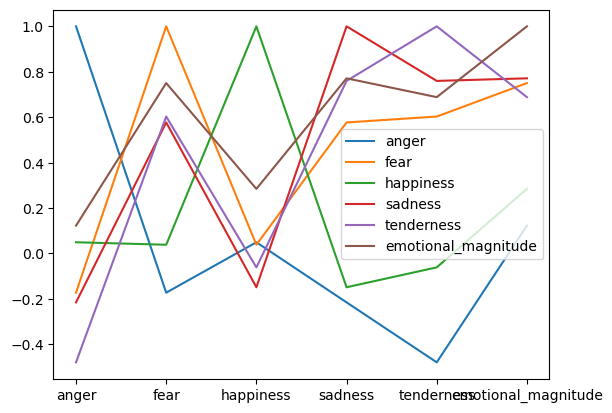

In [76]:
plot_emovectors_corr(df_emo_gtzan)

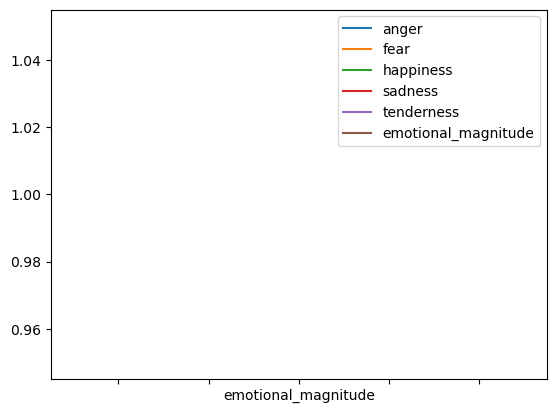

In [77]:
plot_emovectors_corr(df_emo_iv)